<a href="https://colab.research.google.com/github/seb208/Assignments/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

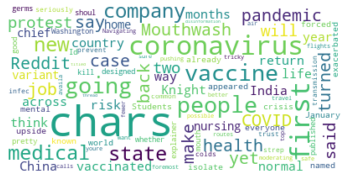

In [ ]:
#Sebastian Chinen
#Homework 5
#CS 4650
#Instructor: Nima Davarpanah
#3/28/2022


'''
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg
'''

import pickle
import en_core_web_lg
from newsapi import NewsApiClient
import spacy
import pandas as pd
from collections import Counter 
import string
from wordcloud import WordCloud 
from textblob import TextBlob
import matplotlib.pyplot as plt

nlp_eng = en_core_web_lg.load()
#nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient(api_key='fff0f4f4a5ab498ea396e029091fa060')

articles = newsapi.get_everything(q='coronavirus', language='en', 
from_param='2022-02-28', to='2020-03-27', sort_by='relevancy')

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))


#Clean data and conver to Pandas DataFrame
dados = []
for x in articles['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title':title[0],'desc':description[0], 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

#Function Definition for keywords
def get_keywords_eng(token):
  result = []
  for i in token:
    if (token in nlp_eng.Defaults.stop_words or token in string.punctuation):
      continue
    else:
      result.append(token)
  return result

results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

#for plotting
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()